In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

In [3]:
print("First few rows of the dataset:")
print(iris_df.head())

First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [4]:
print("\nStatistical summary of the dataset:")
print(iris_df.describe())


Statistical summary of the dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [5]:
print("\nClass distribution:")
print(iris_df['species'].value_counts())


Class distribution:
species
0    50
1    50
2    50
Name: count, dtype: int64


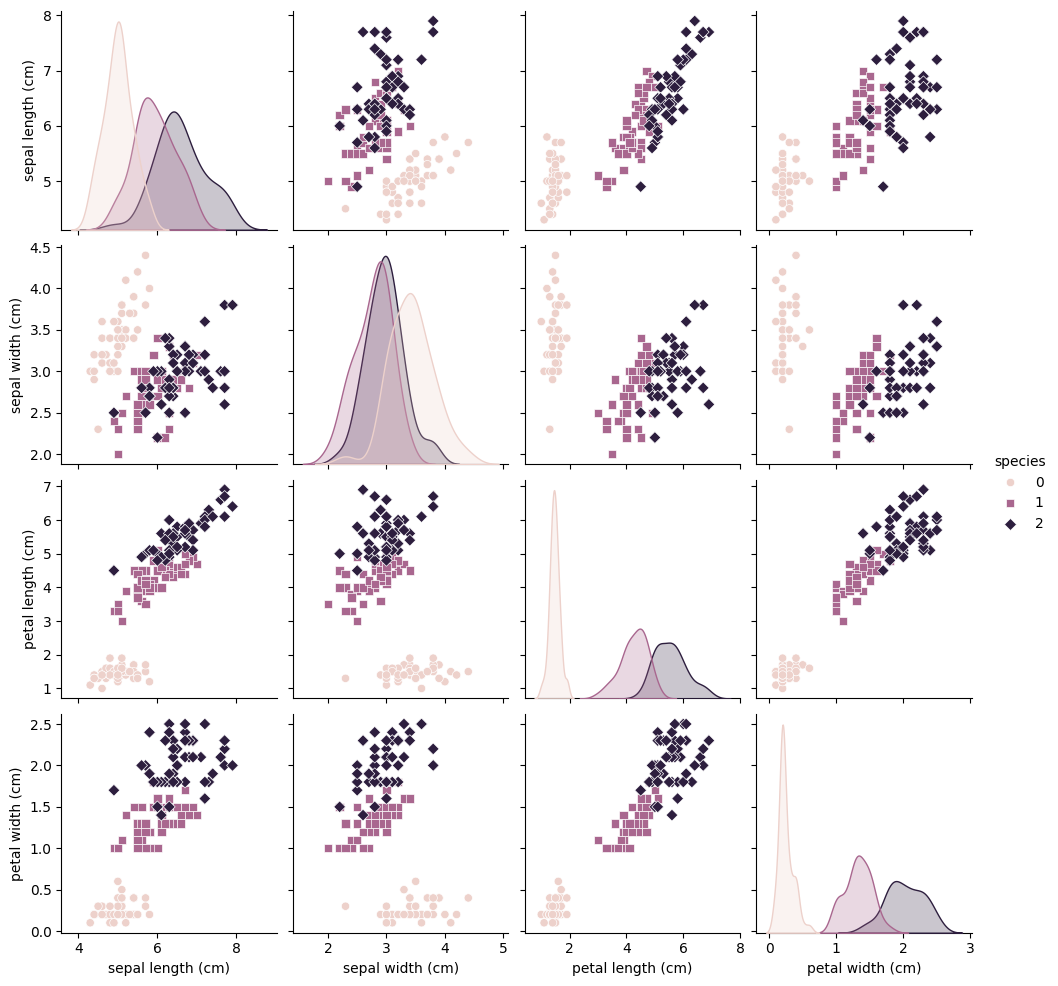

In [6]:
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.show()

In [7]:
X = iris_df.drop(columns=['species'])
y = iris_df['species']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)


Model Evaluation:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


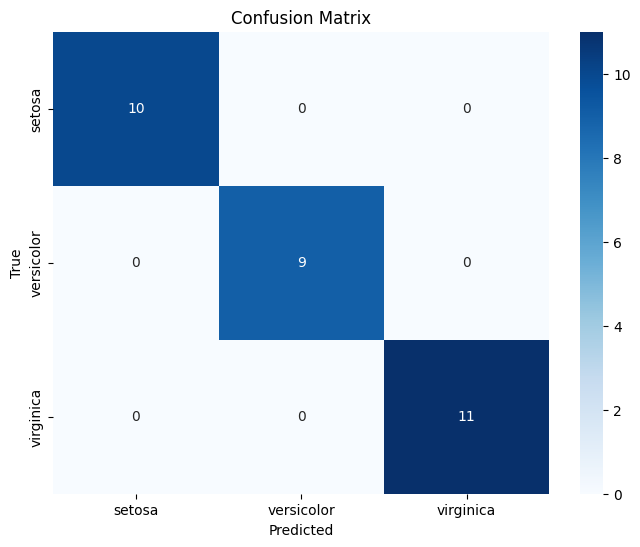

In [12]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Boxplot for each feature grouped by species
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.boxplot(data=iris_df, x='species', y='sepal length (cm)')
plt.title('Sepal Length by Species')

plt.subplot(2, 2, 2)
sns.boxplot(data=iris_df, x='species', y='sepal width (cm)')
plt.title('Sepal Width by Species')

plt.subplot(2, 2, 3)
sns.boxplot(data=iris_df, x='species', y='petal length (cm)')
plt.title('Petal Length by Species')

plt.subplot(2, 2, 4)
sns.boxplot(data=iris_df, x='species', y='petal width (cm)')
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()

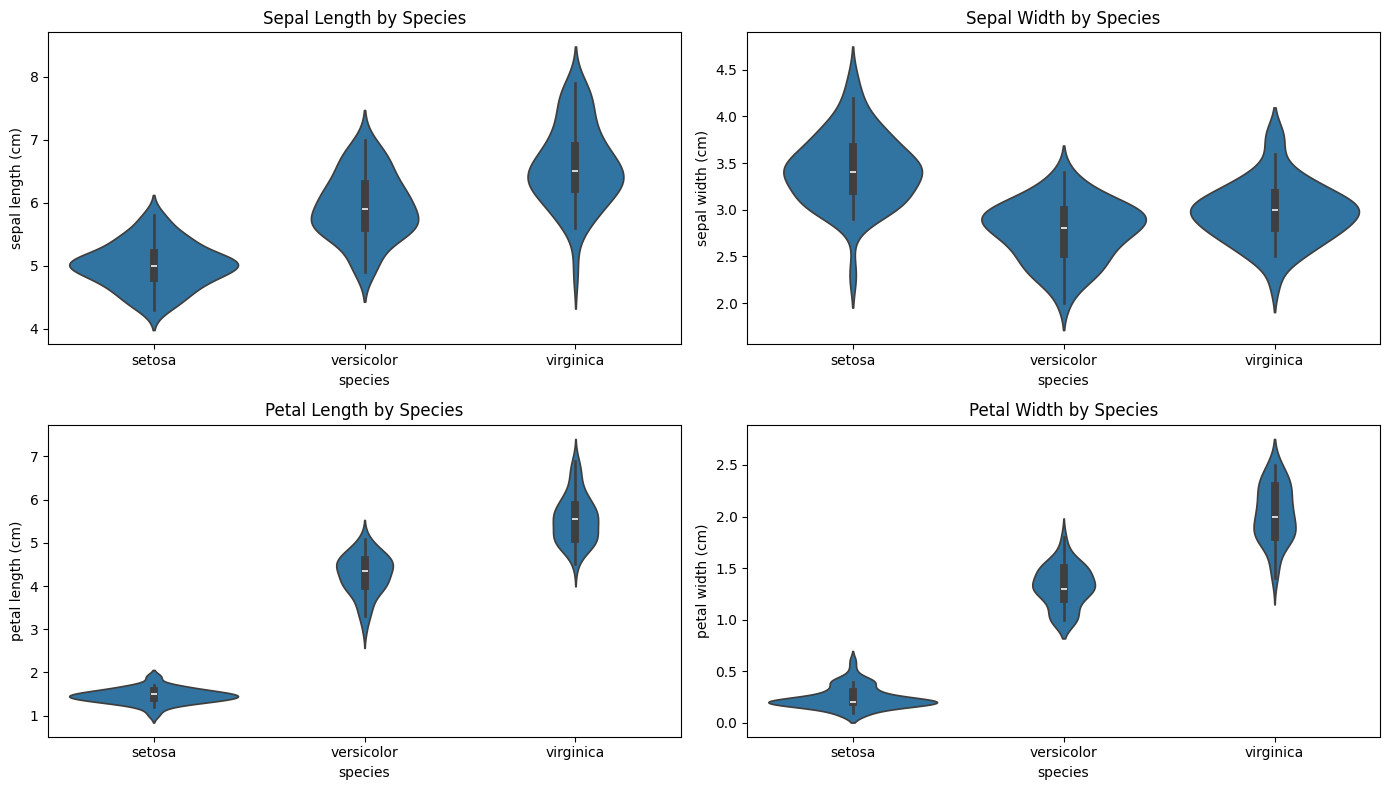

In [15]:
# Violin plot for each feature grouped by species
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.violinplot(data=iris_df, x='species', y='sepal length (cm)')
plt.title('Sepal Length by Species')

plt.subplot(2, 2, 2)
sns.violinplot(data=iris_df, x='species', y='sepal width (cm)')
plt.title('Sepal Width by Species')

plt.subplot(2, 2, 3)
sns.violinplot(data=iris_df, x='species', y='petal length (cm)')
plt.title('Petal Length by Species')

plt.subplot(2, 2, 4)
sns.violinplot(data=iris_df, x='species', y='petal width (cm)')
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()

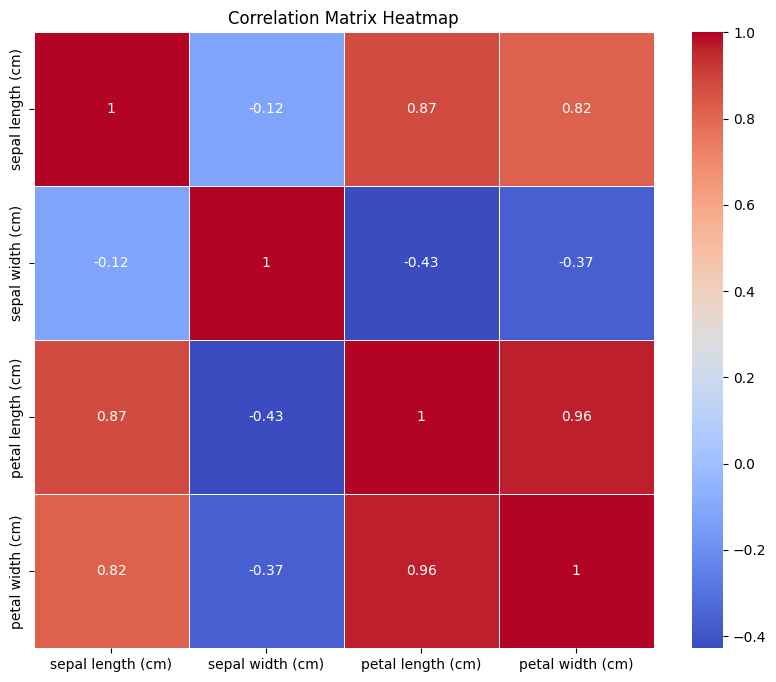

In [16]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = iris_df.drop(columns=['species']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
# Scatter plots of feature pairs to highlight species separation
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='deep')
plt.title('Sepal Length vs Sepal Width')

plt.subplot(2, 2, 2)
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='species', palette='deep')
plt.title('Petal Length vs Petal Width')

plt.subplot(2, 2, 3)
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='deep')
plt.title('Sepal Length vs Petal Length')

plt.subplot(2, 2, 4)
sns.scatterplot(data=iris_df, x='sepal width (cm)', y='petal width (cm)', hue='species', palette='deep')
plt.title('Sepal Width vs Petal Width')

plt.tight_layout()
plt.show()